<div style="border-radius:10px; padding: 15px; background-color: #7e2266 ; font-size:130%; text-align:left">

<h2 align="left"><font color=#ffffff>UNEMPLOYMENT ANALYSIS DUE TO COVID :</font></h2>

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#reading the dataset and storing it as a dataframe
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
#displaying the dataframe
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [3]:
#displaying the shape
df.shape

(267, 9)

In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
#checking for null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

<Axes: >

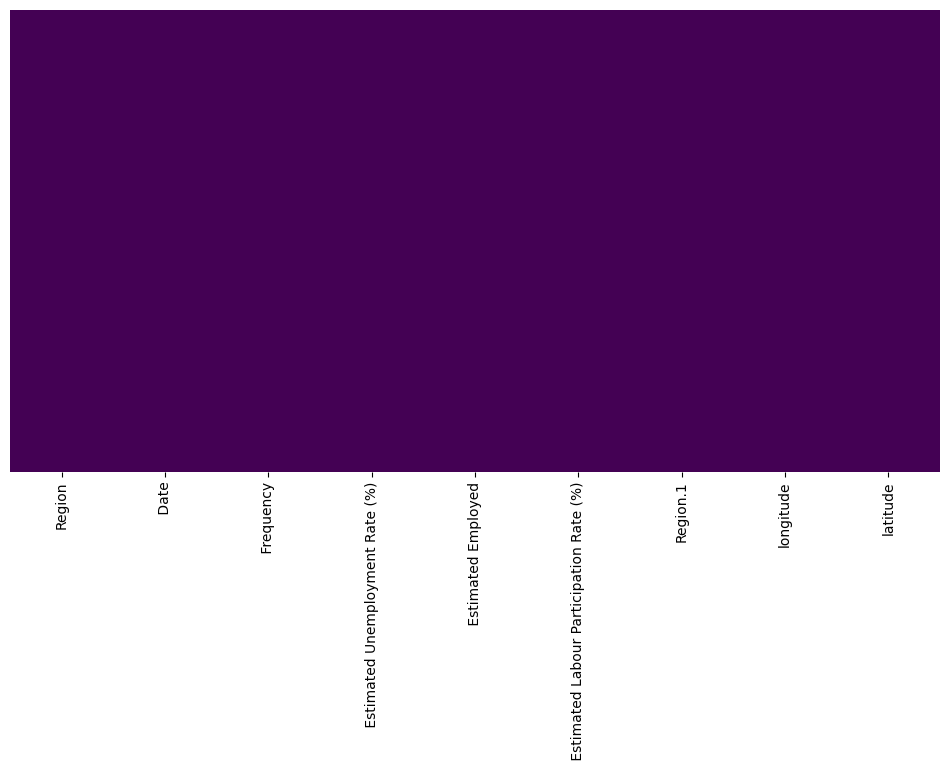

In [6]:
plt.rc('figure',figsize=(12,6))
plt.rcParams['figure.figsize']
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

AS WE CAN SEE THERE IS NO NULL VALUE IN THE GIVEN DATA SET

In [7]:
#changing column names so that they dont have white-spaces, numbers or any special-characters
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation',
             'Region','longitude','latitude']

In [8]:
#displaying the updated dataframe
df.head(3)

States         Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh   31-01-2020         M                         5.48   
1  Andhra Pradesh   29-02-2020         M                         5.83   
2  Andhra Pradesh   31-03-2020         M                         5.79   

   Estimated Employed  Estimated Labour Participation Region  longitude  \
0            16635535                           41.02  South    15.9129   
1            16545652                           40.90  South    15.9129   
2            15881197                           39.18  South    15.9129   

   latitude  
0     79.74  
1     79.74  
2     79.74

In [9]:
#converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
#converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')
#extracting the 'Month' from the Date
df['Month'] =  df['Date'].dt.month
#creating a new column 'MonthNumber' by converting the 'Month' column values to integers
df['MonthNumber'] = df['Month'].apply(lambda x : int(x))
#creating a new column 'MonthName' by converting the 'MonthNumber' column values to the monthNames
df['MonthName'] =  df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])
#ensuring the categorical vairable
df['Region'] = df['Region'].astype('category')

In [10]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

States       Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh 2020-01-31         M                         5.48   
1  Andhra Pradesh 2020-02-29         M                         5.83   
2  Andhra Pradesh 2020-03-31         M                         5.79   

   Estimated Employed  Estimated Labour Participation Region  longitude  \
0            16635535                           41.02  South    15.9129   
1            16545652                           40.90  South    15.9129   
2            15881197                           39.18  South    15.9129   

   latitude  MonthNumber MonthName  
0     79.74            1       Jan  
1     79.74            2       Feb  
2     79.74            3       Mar

In [11]:
#5-number summary
df.describe()

Date  Estimated Unemployment Rate  \
count                            267                   267.000000   
mean   2020-06-16 09:15:30.337078528                    12.236929   
min              2020-01-31 00:00:00                     0.500000   
25%              2020-03-31 00:00:00                     4.845000   
50%              2020-06-30 00:00:00                     9.650000   
75%              2020-08-31 00:00:00                    16.755000   
max              2020-10-31 00:00:00                    75.850000   
std                              NaN                    10.803283   

       Estimated Employed  Estimated Labour Participation   longitude  \
count        2.670000e+02                      267.000000  267.000000   
mean         1.396211e+07                       41.681573   22.826048   
min          1.175420e+05                       16.770000   10.850500   
25%          2.838930e+06                       37.265000   18.112400   
50%          9.732417e+06                       40.390000   23.610200   
75%          2.187869e+07                       44.055000   27.278400   
max          5.943376e+07                       69.690000   33.778200   
std          1.336632e+07                        7.845419    6.270731   

         latitude  MonthNumber  
count  267.000000   267.000000  
mean    80.532425     5.535581  
min     71.192400     1.000000  
25%     76.085600     3.000000  
50%     79.019300     6.000000  
75%     85.279900     8.000000  
max     92.937600    10.000000  
std      5.831738     2.870915

In [12]:
#5-number summary of the numerical variables which give some information
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation']].describe().T,2)

count         mean          std        min  \
Estimated Unemployment Rate     267.0        12.24        10.80       0.50   
Estimated Employed              267.0  13962105.72  13366318.36  117542.00   
Estimated Labour Participation  267.0        41.68         7.85      16.77   

                                       25%         50%          75%  \
Estimated Unemployment Rate           4.84        9.65        16.76   
Estimated Employed              2838930.50  9732417.00  21878686.00   
Estimated Labour Participation       37.26       40.39        44.06   

                                        max  
Estimated Unemployment Rate           75.85  
Estimated Employed              59433759.00  
Estimated Labour Participation        69.69

In [13]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = df.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation  
0                           40.11  
1                           38.70  
2                           52.06  
3                           40.44  
4                           41.26

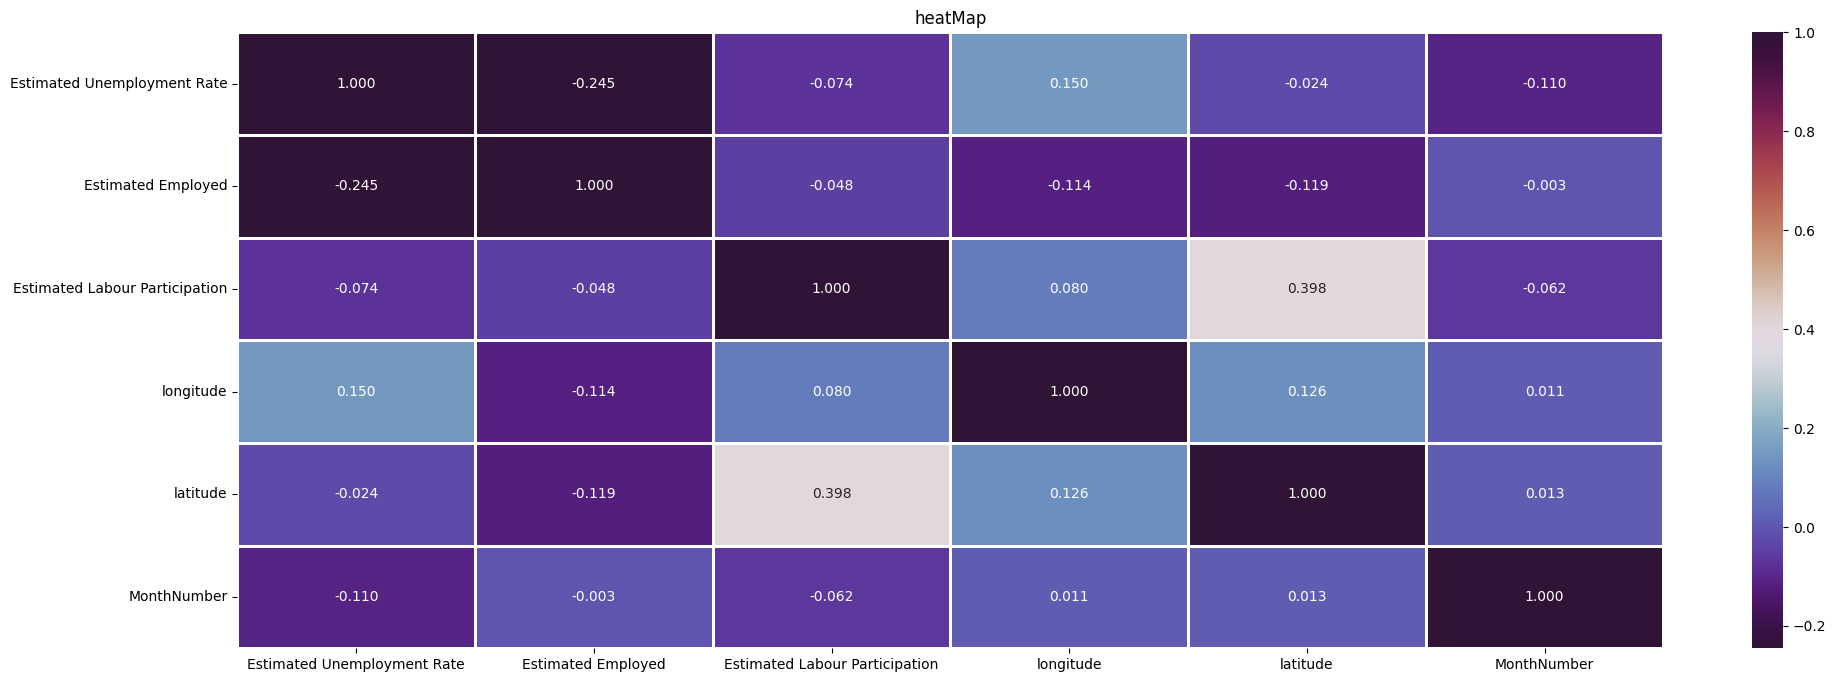

In [14]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values

#dataframe of all the numerical columns
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed', 
              'Estimated Labour Participation', 'longitude', 'latitude', 'MonthNumber']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

## EDA - Exploratory Data Analysis

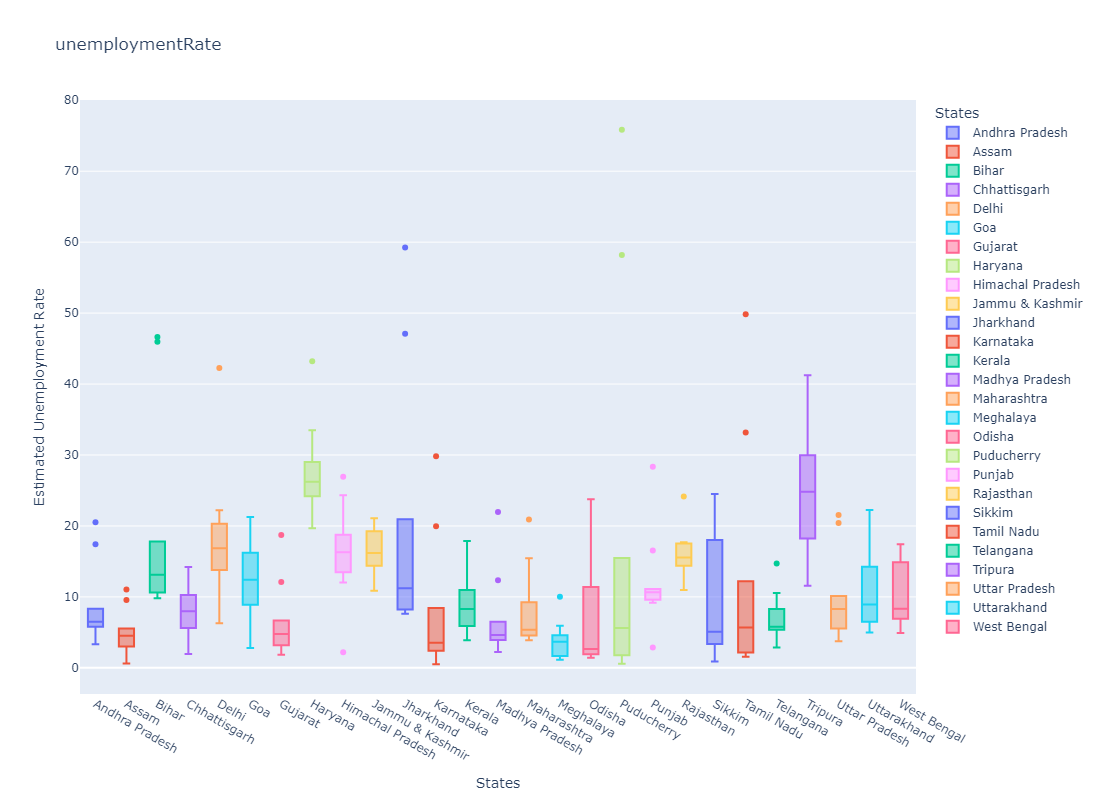

In [15]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    df,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='unemploymentRate',
    template='plotly',height=800
)
fig.show()


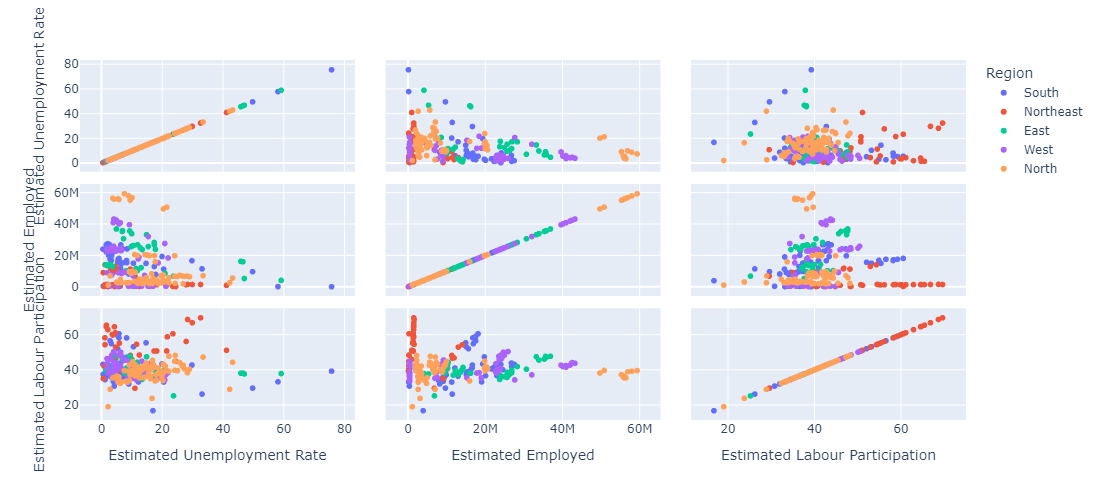

In [16]:
#creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(df,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation'],
    color='Region',height=500)
fig.show()

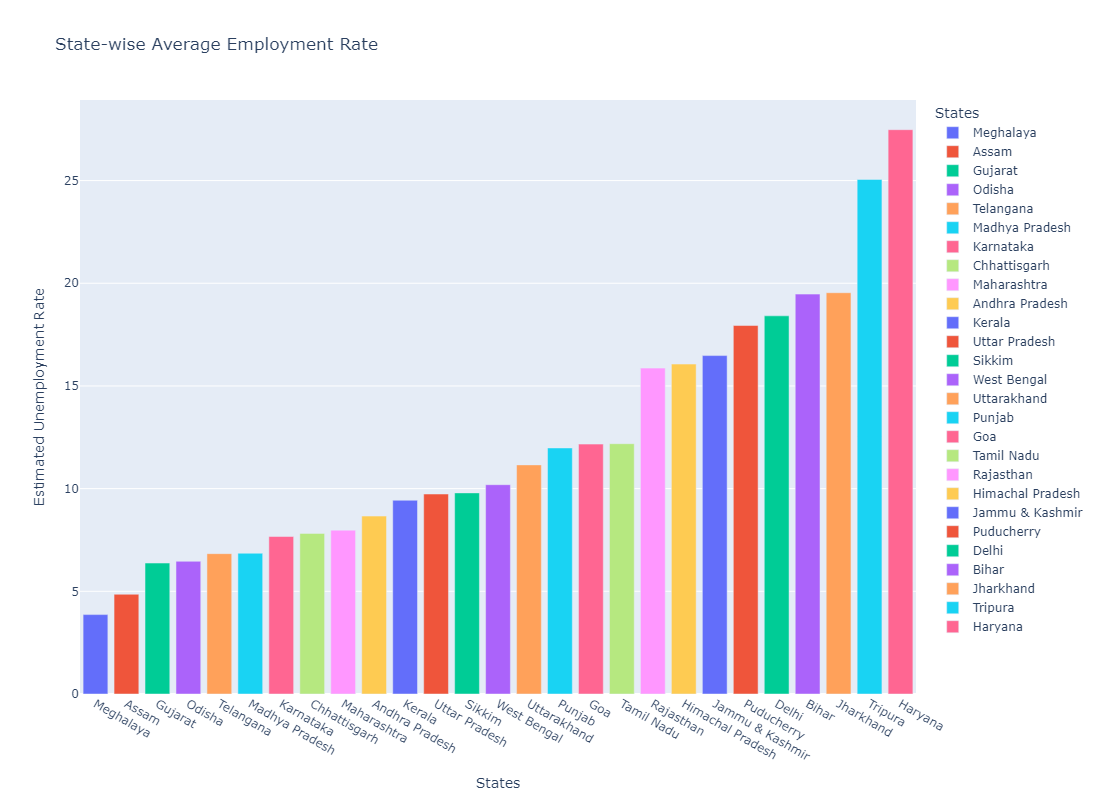

In [17]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = df[['Estimated Unemployment Rate','States']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('States').mean().reset_index()

#sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF, 
             x='States',
             y='Estimated Unemployment Rate',
             color='States',
             title='State-wise Average Employment Rate',height=800)
fig.show()

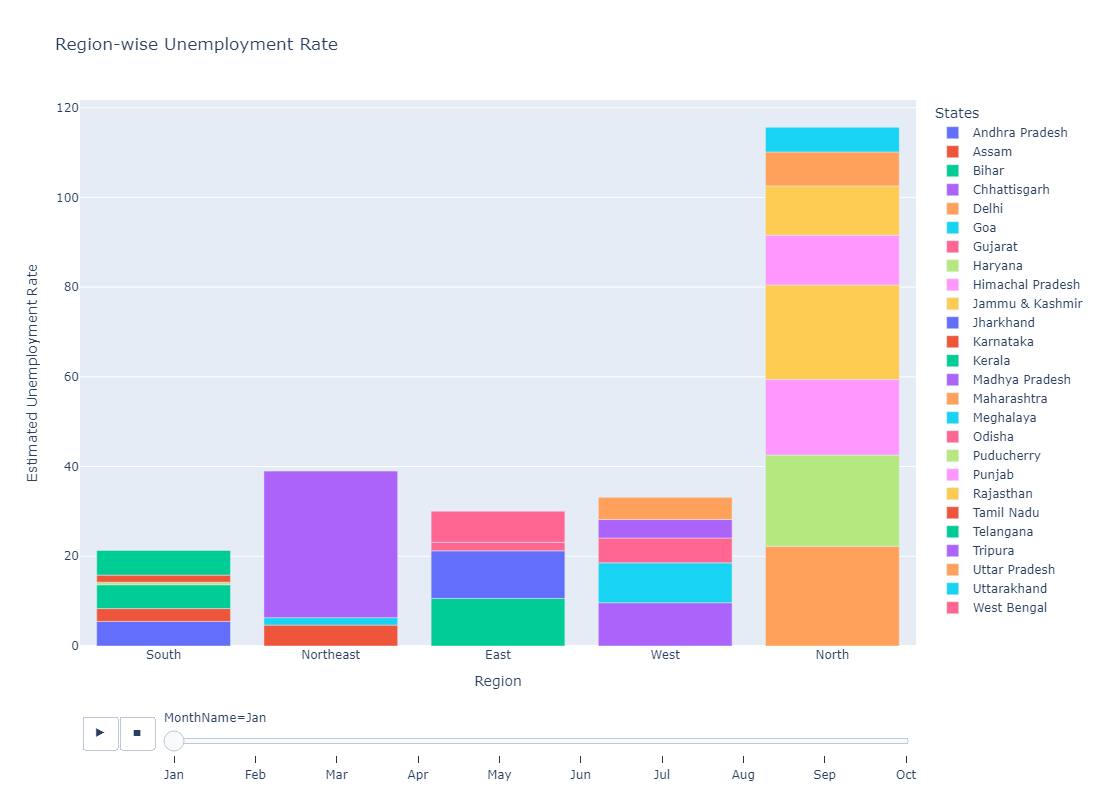

In [18]:
#plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df, 
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='States',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

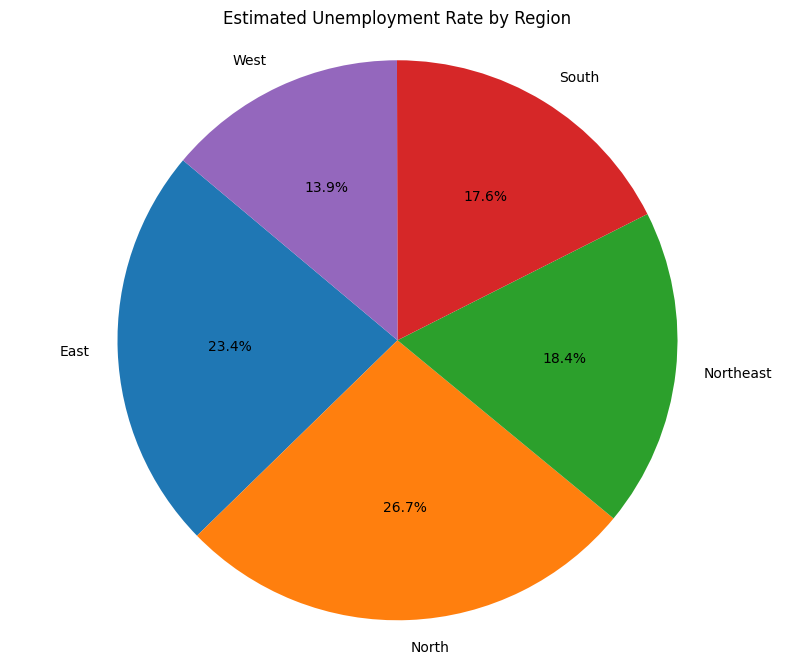

In [19]:

# Creating a new dataframe with 'Region-wise' Estimated Unemployment Rate
unempDF = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation']]

# Group by 'Region' and calculate the mean unemployment rate
region_unempDF = unempDF.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(region_unempDF['Estimated Unemployment Rate'], 
        labels=region_unempDF['Region'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.tab10.colors)  # Use tab10 colormap for better differentiation

plt.title('Estimated Unemployment Rate by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [20]:
# creating a new dataframe with 'State-wise' & 'Region-wisee' Estimated Unemployment Rate
unempDF = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation']]

unempDF = unempDF.groupby(['States'])['Estimated Unemployment Rate'].mean().reset_index()

#printing the new dataframe
unempDF.head(4)

States  Estimated Unemployment Rate
0  Andhra Pradesh                        8.664
1           Assam                        4.856
2           Bihar                       19.471
3    Chhattisgarh                        7.819

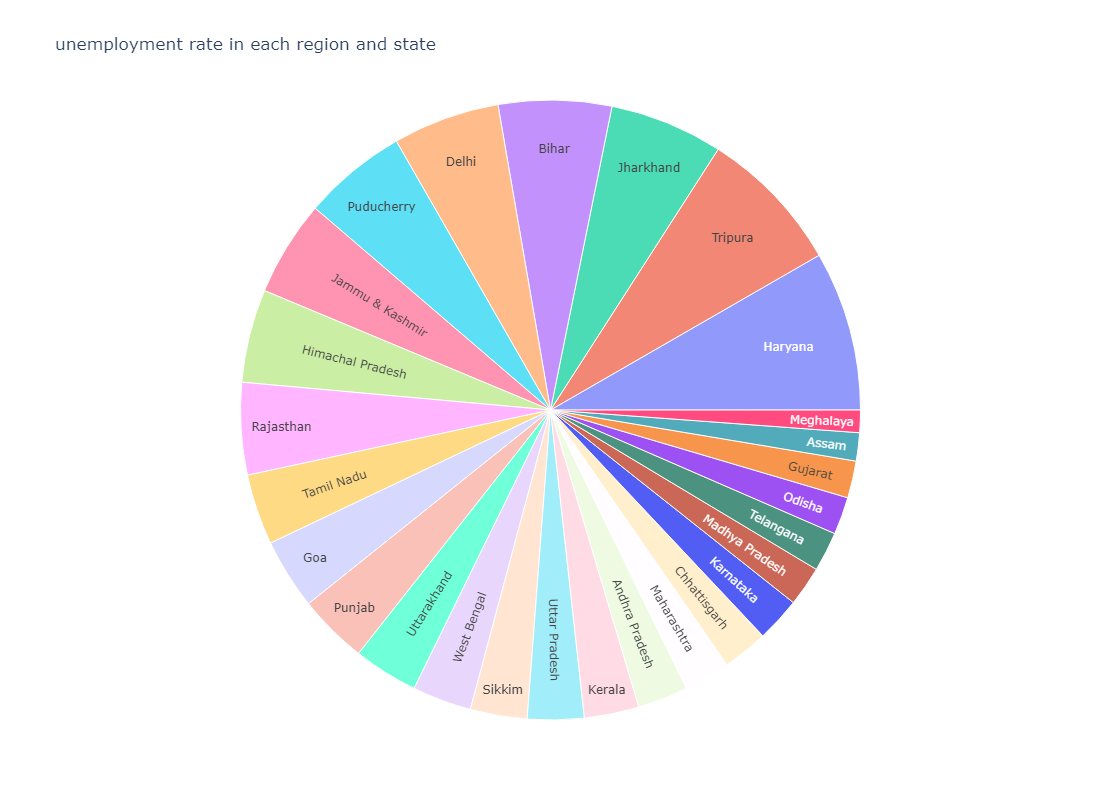

In [21]:
#a sunburst chart (hierarchical chart) for unemployment rate region-wise and state-wise
fig = px.sunburst(unempDF, 
                  path=['States'], 
                  values='Estimated Unemployment Rate',
                  title= 'unemployment rate in each region and state',
                  height=800)
fig.show()

In [22]:
unempDF = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation']]

unempDF = unempDF.groupby(['Region'])['Estimated Unemployment Rate'].mean().reset_index()

#printing the new dataframe
unempDF.head(4)

Region  Estimated Unemployment Rate
0       East                    13.916000
1      North                    15.889620
2  Northeast                    10.950263
3      South                    10.454667

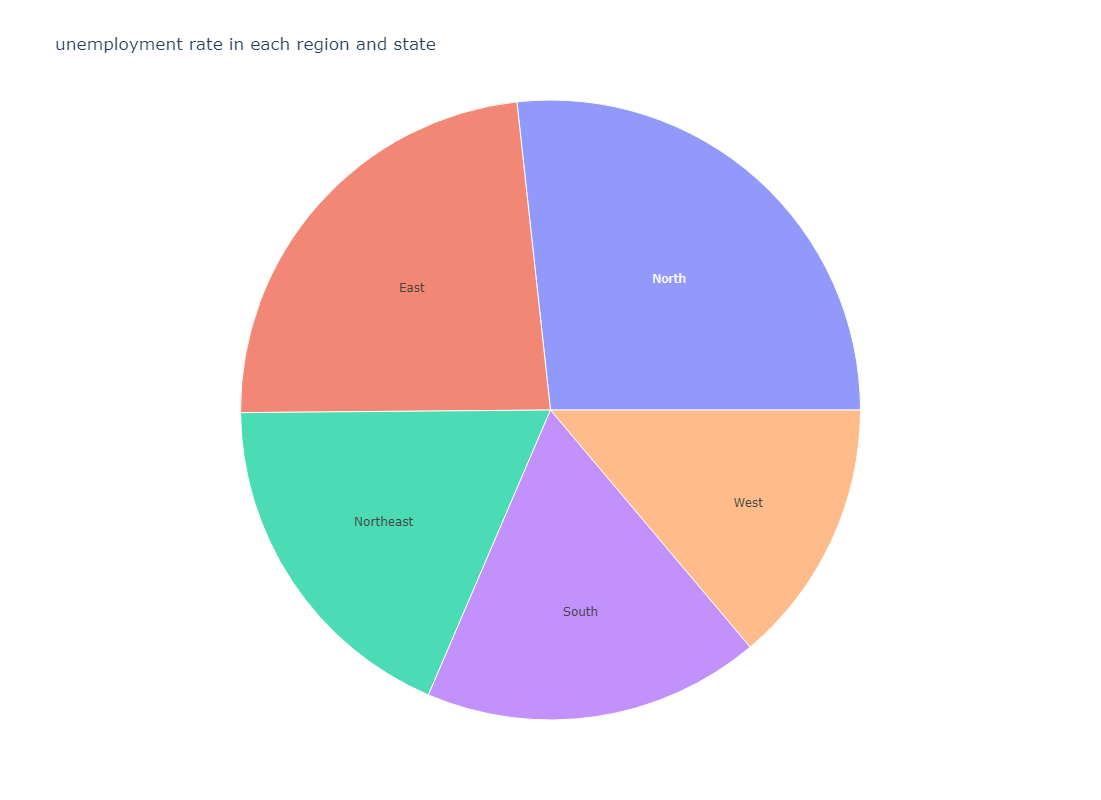

In [23]:
#a sunburst chart (hierarchical chart) for unemployment rate region-wise and state-wise
fig = px.sunburst(unempDF, 
                  path=['Region'], 
                  values='Estimated Unemployment Rate',
                  title= 'unemployment rate in each region and state',
                  height=800)
fig.show()

## Impact of Lockdown on States Estimated Employed

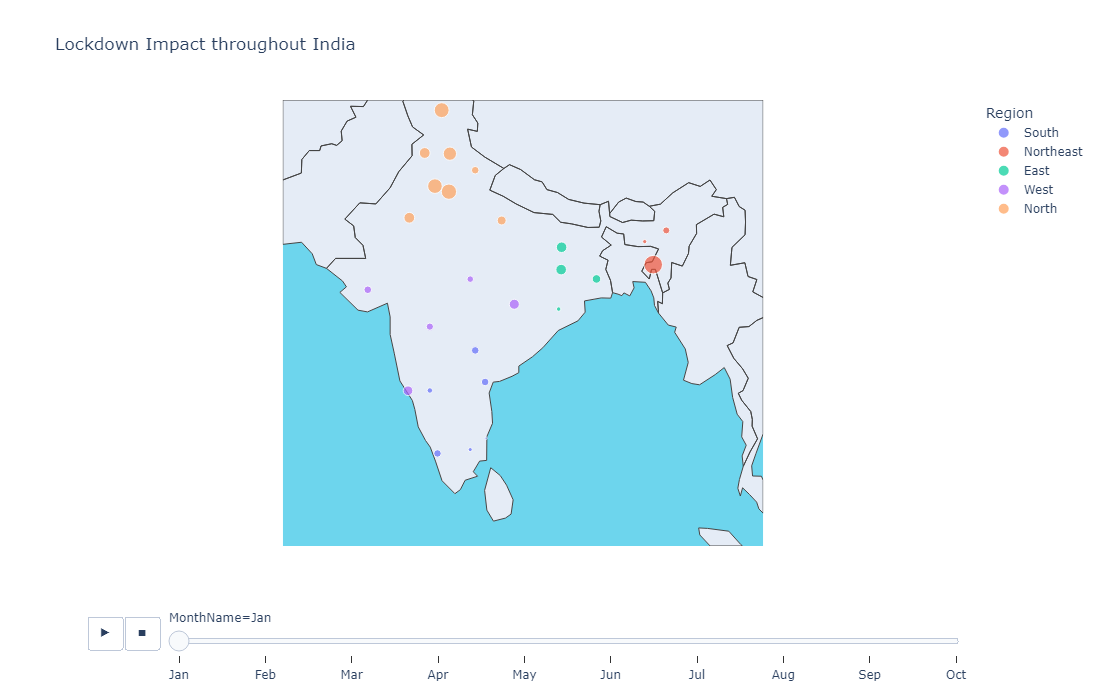

In [24]:
#creating a scatter geospatial plot
fig = px.scatter_geo(df,'longitude', 'latitude', 
                     color="Region",
                     hover_name="States", 
                     size="Estimated Unemployment Rate",
                     animation_frame="MonthName",
                     scope='asia',
                     title='Lockdown Impact throughout India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

#updating the geospatial axes ranges and ocean color
fig.update_geos(lataxis_range=[5,35], 
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)
# Updating the layout to increase the size of the map
fig.update_layout(width=1000, height=700)

fig.show()

In [25]:
#filtering dataset between month 4 and 7 (inclusive) - after lockdown
m_lock_after = df[(df['MonthNumber'] >= 4) & (df['MonthNumber'] <=7)]

#filtering dataset between month 1 and 4 (inclusive) - before lockdown
m_lock_before = df[(df['MonthNumber'] >= 1) & (df['MonthNumber'] <=4)]

In [26]:
#grouping the dataframe on the basis of "States" and finding the corresponding mean values
m_lock_after = m_lock_after.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#grouping the dataframe on the basis of "States" and finding the corresponding mean values
m_lock_before = m_lock_before.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
m_lock_after['Unemployment Rate before lockdown'] = m_lock_before['Estimated Unemployment Rate']

#renaming the column values for better understanding
m_lock_after.columns = ['States','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
m_lock_after.head()

States  unemploymentRate A/ lockdown  unemploymentRate B/ lockdown
0  Andhra Pradesh                       12.3975                        9.4025
1           Assam                        6.2450                        6.2250
2           Bihar                       30.8025                       20.7425
3    Chhattisgarh                        9.6025                        7.2450
4           Delhi                       24.3600                       17.6975

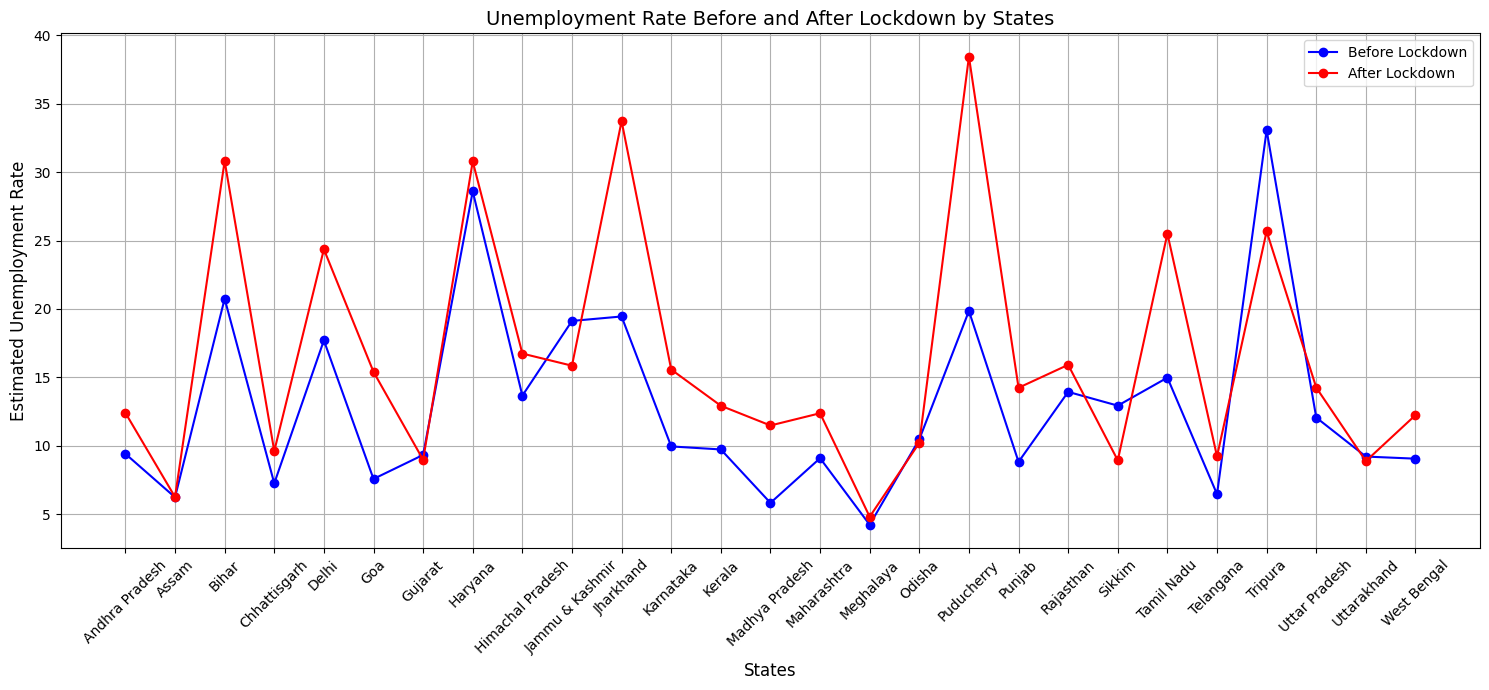

In [29]:

# Prepare the data for plotting
states = m_lock_after['States']
unemployment_before = m_lock_after['unemploymentRate B/ lockdown']
unemployment_after = m_lock_after['unemploymentRate A/ lockdown']

# Plotting the line graph
plt.figure(figsize=(15, 7))

# Plotting before lockdown
plt.plot(states, unemployment_before, marker='o', label='Before Lockdown', color='blue')

# Plotting after lockdown
plt.plot(states, unemployment_after, marker='o', label='After Lockdown', color='red')

# Adding titles and labels
plt.title('Unemployment Rate Before and After Lockdown by States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Estimated Unemployment Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate state names for better visibility
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


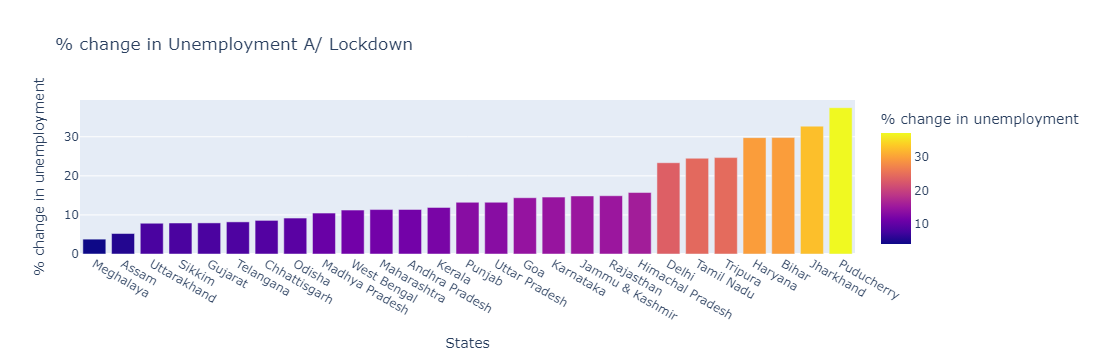

In [30]:
#computing the % change in unemployment rate
m_lock_after['% change in unemployment'] = round(m_lock_after['unemploymentRate A/ lockdown'] 
                                                 - m_lock_after['unemploymentRate B/ lockdown']/m_lock_after['unemploymentRate B/ lockdown'],2)
#sorting the values in the "after lockdown dataframe" on the basis of "%change in unemployment"
m_lock_after = m_lock_after.sort_values('% change in unemployment')
#plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
fig = px.bar(m_lock_after, x='States',y='% change in unemployment',
             color='% change in unemployment',
             title='% change in Unemployment A/ Lockdown')

fig.show()

In [31]:
import plotly.express as px

# Function to classify the impact based on the percentage change in unemployment
def sort_impact(x):
    """Classify impact based on unemployment change."""
    if x <= 10:
        return '🥲 Light Impact'
    elif x <= 20:
        return '🥲😥 Moderate Impact'
    elif x <= 30:
        return '🥲😥😖 Significant Impact'
    elif x <= 40:
        return '🥲😥😖🤯 Severe Impact'
    return x

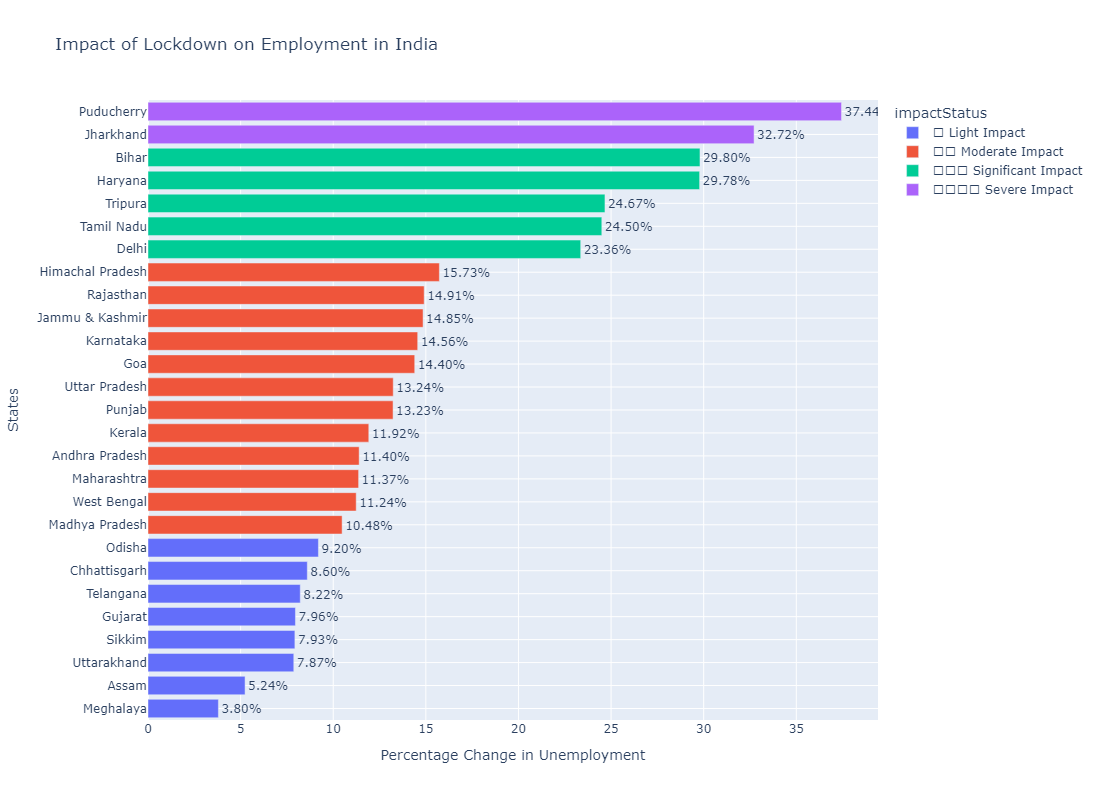

In [32]:
# Apply the sorting function to classify impact status
m_lock_after['impactStatus'] = m_lock_after['% change in unemployment'].apply(sort_impact)

# Create a bar graph to visualize the impact of lockdown on employment in different states
fig = px.bar(m_lock_after, 
             y='States',
             x='% change in unemployment',
             color='impactStatus',
             title='Impact of Lockdown on Employment in India',
             labels={'% change in unemployment': 'Percentage Change in Unemployment'},
             color_discrete_sequence=px.colors.qualitative.Plotly,  # Use a qualitative color palette
             text='% change in unemployment')  # Display the unemployment change on the bars

# Improve layout and aesthetics
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')  # Show values on top of bars
fig.update_layout(yaxis_title='States',
                  xaxis_title='Percentage Change in Unemployment',
                  xaxis=dict(showgrid=True),  # Add grid lines for better readability
                  yaxis=dict(showgrid=True),height=800)

# Show the plot
fig.show()



The states and territories in India that experienced the highest levels of unemployment during the lockdown include:

- Puducherry
- Jharkhand
- Bihar
- Haryana
- Tripura
- Tamil Nadu
- Delhi


In [ ]:
#END